In [191]:
import random
random.seed(1)

import numpy as np
np.random.seed(1)

import itertools
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import tensorflow as tf

In [192]:
objects_to_rank = {'dress', 'shirt', 'pants'}

all_permutations = list(itertools.permutations(objects_to_rank))

for x in sorted(all_permutations):
  print(x)

('dress', 'pants', 'shirt')
('dress', 'shirt', 'pants')
('pants', 'dress', 'shirt')
('pants', 'shirt', 'dress')
('shirt', 'dress', 'pants')
('shirt', 'pants', 'dress')


In [193]:
np.random.randn(1)

array([1.62434536])

In [194]:
scores_dict = {x: np.random.randn(1)[0] for x in ['shirt', 'pants', 'dress']}

print(scores_dict)

{'shirt': -0.6117564136500754, 'pants': -0.5281717522634557, 'dress': -1.0729686221561705}


In [195]:
random.choice([1,3,5,2,23,4])


3

In [196]:
pi = random.choice(all_permutations)

print(pi)

('shirt', 'dress', 'pants')


In [197]:
obj_pos_1, obj_pos_2, obj_pos_3 = pi

print(f"object at position 1 is '{obj_pos_1}'")
print(f"object at position 2 is '{obj_pos_2}'")
print(f"object at position 3 is '{obj_pos_3}'")

object at position 1 is 'shirt'
object at position 2 is 'dress'
object at position 3 is 'pants'


In [198]:
score_obj_pos_1 = scores_dict[obj_pos_1]
score_obj_pos_2 = scores_dict[obj_pos_2]
score_obj_pos_3 = scores_dict[obj_pos_3]
scores_dict, score_obj_pos_3,score_obj_pos_1,score_obj_pos_2

({'shirt': -0.6117564136500754,
  'pants': -0.5281717522634557,
  'dress': -1.0729686221561705},
 -0.5281717522634557,
 -0.6117564136500754,
 -1.0729686221561705)

In [199]:
def prob(first, second, third):
  first_term_numerator = np.exp(first)
  first_term_denominator = np.exp(first) + np.exp(second) + np.exp(third)

  first_term = first_term_numerator / first_term_denominator

  print(f"first term is {first_term}")

  second_term_numerator = np.exp(second)
  second_term_denominator = np.exp(second) + np.exp(third)

  second_term = second_term_numerator / second_term_denominator

  print(f"second term is {second_term}")

  third_term = 1.0

  print(f"second term is {third_term}")

  prob_of_permutation = first_term * second_term * third_term

  print(f"probability of permutation is {prob_of_permutation}")

  return prob_of_permutation * 100

In [200]:
all_permutations

[('dress', 'pants', 'shirt'),
 ('dress', 'shirt', 'pants'),
 ('pants', 'dress', 'shirt'),
 ('pants', 'shirt', 'dress'),
 ('shirt', 'dress', 'pants'),
 ('shirt', 'pants', 'dress')]

In [201]:
scores_dict[obj_pos_1], scores_dict['shirt']

(-0.6117564136500754, -0.6117564136500754)

In [202]:
all_probs = []
for permut in all_permutations:
  obj_pos_1, obj_pos_2, obj_pos_3 = permut
  print(obj_pos_1, obj_pos_2, obj_pos_3)
  score_pos_1 = scores_dict[obj_pos_1]
  print(f'Score [1] is {score_pos_1}')
  score_pos_2 = scores_dict[obj_pos_2]
  print(f'Score [2] is {score_pos_2}')
  score_pos_3 = scores_dict[obj_pos_3]
  print(f'Score [3] is {score_pos_3}')
  # print(score_obj_pos_1, score_obj_pos_2, score_obj_pos_3)
  all_probs.append(prob(score_pos_1, score_pos_2, score_pos_3))

dress pants shirt
Score [1] is -1.0729686221561705
Score [2] is -0.5281717522634557
Score [3] is -0.6117564136500754
first term is 0.2320049170469356
second term is 0.5208840081002813
second term is 1.0
probability of permutation is 0.1208476510903811
dress shirt pants
Score [1] is -1.0729686221561705
Score [2] is -0.6117564136500754
Score [3] is -0.5281717522634557
first term is 0.2320049170469356
second term is 0.47911599189971854
second term is 1.0
probability of permutation is 0.11115726595655447
pants dress shirt
Score [1] is -0.5281717522634557
Score [2] is -1.0729686221561705
Score [3] is -0.6117564136500754
first term is 0.40003635700990026
second term is 0.38669829373438225
second term is 1.0
probability of permutation is 0.15469337668744662
pants shirt dress
Score [1] is -0.5281717522634557
Score [2] is -0.6117564136500754
Score [3] is -1.0729686221561705
first term is 0.40003635700990026
second term is 0.6133017062656178
second term is 1.0
probability of permutation is 0.245

In [203]:
all_probs

[12.084765109038111,
 11.115726595655447,
 15.469337668744663,
 24.534298032245363,
 13.506749826825901,
 23.289122767490507]

In [204]:
sum(all_probs).astype(str) + "%"

'99.99999999999999%'

So, the recommendation for the most beneficial permutation would be:

In [205]:
# getting indices in descending order of probabilities
np.argsort(all_probs)[::-1]

array([3, 5, 2, 4, 0, 1])

In [206]:
indices_desc = np.argsort(all_probs)[::-1]
ordered_seq = []
for index in indices_desc:
  ordered_seq.append((all_permutations[index], all_probs[index]))
print(f'Recommendations are: \n')
for i in ordered_seq:
  print(i)

Recommendations are: 

(('pants', 'shirt', 'dress'), 24.534298032245363)
(('shirt', 'pants', 'dress'), 23.289122767490507)
(('pants', 'dress', 'shirt'), 15.469337668744663)
(('shirt', 'dress', 'pants'), 13.506749826825901)
(('dress', 'pants', 'shirt'), 12.084765109038111)
(('dress', 'shirt', 'pants'), 11.115726595655447)


## Calculating the probability of each permutation in our set, we can see that each one is greater than zero and that they sum to one!

### So, with listwise loss function, we got to calculate the **Permutation Probability** Distributions for each training example.

i.e There are $ n! $ permutations!

# Top one probability

$$ \large
P_s(j) = \sum\limits_{\pi(1) = j, \pi \in \Omega_n}{} P_s(\pi)
$$


$$ \large
P_s(j) = \frac{e^{S_j}}  {\sum\limits_{k=1}^{n}   e^{S_k}}
$$

In [207]:
# getting top 1 prob for shirt, so adding prob where shirt is the first occurence i.e 1.4+0.12 %
np.exp(scores_dict['shirt']) / sum(np.exp(list(scores_dict.values()))) * 100, 1.47+0.12

(36.79587259431641, 1.5899999999999999)

### Converting scores and labels to prob

In [208]:
categories = ['shirt', 'pants', 'dress']

ordered_scores = np.array([scores_dict[x] for x in categories]).astype(np.float32)
print(f'{scores_dict}\n')

print(ordered_scores)

# softmax to change it into probability distribution
predicted_prob_dist = tf.nn.softmax(ordered_scores)
predicted_prob_dist

{'shirt': -0.6117564136500754, 'pants': -0.5281717522634557, 'dress': -1.0729686221561705}

[-0.6117564 -0.5281718 -1.0729686]


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.3679587 , 0.4000363 , 0.23200491], dtype=float32)>

In [287]:
# as per the scores dict: {'shirt': -2.30, 'pants': 1.74, 'dress': -0.76}
# giving scores for the relevance
raw_relevance_grades = tf.constant([1.0, 3.0, 0.0], dtype=tf.float32)
print(f'raw_relevance_grades: {raw_relevance_grades}')

true_prob_dist = tf.nn.softmax(raw_relevance_grades)
print(f'true_prob_dist: {true_prob_dist}')

raw_relevance_grades: [1. 3. 0.]
true_prob_dist: [0.11419519 0.8437947  0.04201007]


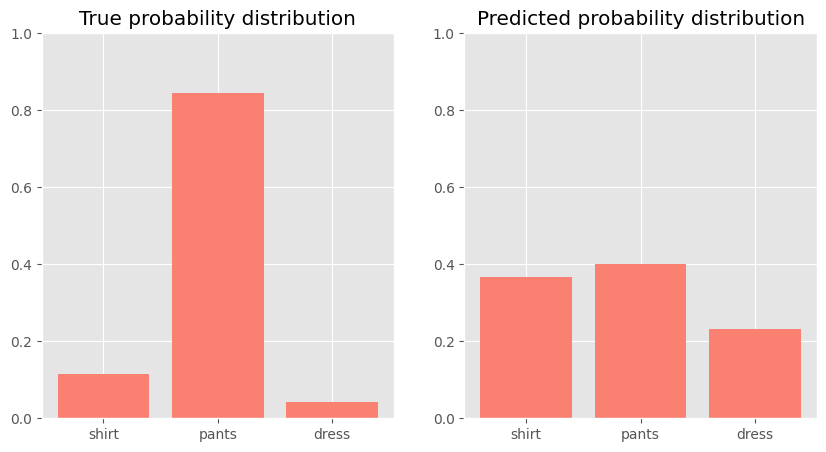

In [288]:
# visualizing it
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))


# True probability distribution
axes[0].bar(categories, true_prob_dist, color='salmon')
axes[0].set_ylim(0, 1)
axes[0].set_title('True probability distribution')

# Predicted probability distribution
axes[1].bar(categories, predicted_prob_dist, color='salmon')
axes[1].set_ylim(0, 1)
axes[1].set_title('Predicted probability distribution')

plt.show()

KL Divergence Loss

$$
D_{KL}  
$$

In [211]:
sum(true_prob_dist * np.log(true_prob_dist/predicted_prob_dist))

<tf.Tensor: shape=(), dtype=float32, numpy=0.4576579>

In [212]:
# trying with same dist for dummy
sum(true_prob_dist * np.log(true_prob_dist / true_prob_dist))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

## Hence, zero loss for same distribution. (Zero KL Divergence)

## Neural Network Architecture Model


- Neural Network $(\omega)$
- Ranking function $(f_\omega)$
- Takes in feature vector $x_j^{(i)}$
    - Feature vector: **(query, document)** pair


$$ \large
P_{neural\ net\ score}(j) = \frac{e^{neural\ net\ score\ for\ object\ j}}{\sum\limits_{k=1}^{n} e^{neural\ net\ score\ for\ object\ k}}
$$

where, $s_j$ is the score of the $j^{th}$ object

### 1. Preparing the dataset

In [213]:
query_1 = "dog"

bing_search_results = [
    "Dog - Wikipedia",
    "Adopting a dog or puppy | RSPCA Australia",
    "dog | History, Domestication, Physical Traits, & Breeds",
    "New South Wales | Dogs & Puppies | Gumtree Australia Free",
    "dog - Wiktionary"
]

query_2 = "what is a dog"

google_search_results = [
    "Dog - Wikipedia",
    "Dog - Simple English Wikipedia, the free encyclopedia",
    "Dog | National Geographic",
    "dog | History, Domestication, Physical Traits, & Breeds",
    "What is a Dog | Facts About Dogs | DK Find Out"
]

# arbitraty relevance grade
relevance_grades = tf.constant([
    [3.0, 2.0, 2.0, 2.0, 1.0],
    [3.0, 3.0, 1.0, 1.0, 0.0]
])

In [214]:
combined_texts = [query_1, *bing_search_results, query_2, *google_search_results]
combined_texts

['dog',
 'Dog - Wikipedia',
 'Adopting a dog or puppy | RSPCA Australia',
 'dog | History, Domestication, Physical Traits, & Breeds',
 'New South Wales | Dogs & Puppies | Gumtree Australia Free',
 'dog - Wiktionary',
 'what is a dog',
 'Dog - Wikipedia',
 'Dog - Simple English Wikipedia, the free encyclopedia',
 'Dog | National Geographic',
 'dog | History, Domestication, Physical Traits, & Breeds',
 'What is a Dog | Facts About Dogs | DK Find Out']

In [215]:
"a", * ["ab", "bs"]

('a', 'ab', 'bs')

In [216]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(combined_texts)

# we add one here to account for the padding word
vocab_size = max(tokenizer.index_word) + 1
print(vocab_size)

35


In [217]:
index_to_word = {}
for idx, word in tokenizer.index_word.items():
    index_to_word[idx] = word

    print(f"index {idx} - {word}")

index 1 - dog
index 2 - wikipedia
index 3 - a
index 4 - australia
index 5 - history
index 6 - domestication
index 7 - physical
index 8 - traits
index 9 - breeds
index 10 - dogs
index 11 - free
index 12 - what
index 13 - is
index 14 - adopting
index 15 - or
index 16 - puppy
index 17 - rspca
index 18 - new
index 19 - south
index 20 - wales
index 21 - puppies
index 22 - gumtree
index 23 - wiktionary
index 24 - simple
index 25 - english
index 26 - the
index 27 - encyclopedia
index 28 - national
index 29 - geographic
index 30 - facts
index 31 - about
index 32 - dk
index 33 - find
index 34 - out


index 0 - reserved for padding values \
Tokenizer : gives numerical index for each word in the overall list

In [218]:
EMBEDDING_DIMS = 2

embeddings = np.random.randn(vocab_size, EMBEDDING_DIMS).astype(np.float32)

print(embeddings, embeddings.shape)

[[ 0.86540765 -2.3015387 ]
 [ 1.7448118  -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.4621079  -2.0601406 ]
 [-0.3224172  -0.38405436]
 [ 1.1337694  -1.0998913 ]
 [-0.1724282  -0.8778584 ]
 [ 0.04221375  0.58281523]
 [-1.1006192   1.1447237 ]
 [ 0.9015907   0.50249434]
 [ 0.90085596 -0.68372786]
 [-0.12289023 -0.93576944]
 [-0.26788807  0.53035545]
 [-0.69166076 -0.39675352]
 [-0.6871727  -0.84520566]
 [-0.6712461  -0.0126646 ]
 [-1.1173104   0.2344157 ]
 [ 1.6598022   0.74204415]
 [-0.19183555 -0.887629  ]
 [-0.7471583   1.6924546 ]
 [ 0.05080776 -0.6369957 ]
 [ 0.19091548  2.1002553 ]
 [ 0.12015896  0.6172031 ]
 [ 0.30017033 -0.35224986]
 [-1.1425182  -0.34934273]
 [-0.20889424  0.5866232 ]
 [ 0.8389834   0.9311021 ]
 [ 0.2855873   0.8851412 ]
 [-0.7543979   1.2528682 ]
 [ 0.5129298  -0.29809284]
 [ 0.48851815 -0.07557172]
 [ 1.1316293   1.5198169 ]
 [ 2.1855755  -1.3964963 ]
 [-1.4441139  -0.5044659 ]
 [ 0.16003707  0.8761689 ]] (35, 2)


## Representing query as Numbers

In [219]:
tokenizer.texts_to_sequences(['wiktionary']), tokenizer.texts_to_sequences([query_2])

([[23]], [[12, 13, 3, 1]])

In [220]:
query_1_embedding_index = tokenizer.texts_to_sequences([query_1])
query_1_embeddings = np.array([embeddings[x] for x in query_1_embedding_index])

print(query_1_embeddings)

[[[ 1.7448118 -0.7612069]]]


In [221]:
query_2_embedding_indices = tokenizer.texts_to_sequences([query_2])
query_2_embeddings = np.array([embeddings[x] for x in query_2_embedding_indices])

print(query_2_embeddings)

[[[-0.26788807  0.53035545]
  [-0.69166076 -0.39675352]
  [ 1.4621079  -2.0601406 ]
  [ 1.7448118  -0.7612069 ]]]


In [222]:
query_1_embedding_index

[[1]]

In [223]:
query_1_embeddings_avg = tf.reduce_mean(query_1_embeddings, axis=1, keepdims=True).numpy()

query_2_embeddings_avg = tf.reduce_mean(query_2_embeddings, axis=1, keepdims=True).numpy()

print(query_2_embeddings_avg)

[[[ 0.5618427 -0.6719364]]]


In [224]:
np.mean(query_2_embeddings[:, :, 0]),np.mean(query_2_embeddings[:, :, 1])

(0.5618427, -0.6719364)

In [225]:
def represent_query(query):
  query_embedding_indices = tokenizer.texts_to_sequences([query])
  query_embeddings = np.array([embeddings[x] for x in query_embedding_indices])
  query_embeddings_avg = tf.reduce_mean(query_embeddings, axis=1, keepdims=True).numpy()
  return query_embeddings_avg

In [226]:
represent_query('Wiktionary and Dog')

array([[[ 1.0224911 , -0.55672836]]], dtype=float32)

In [227]:
query_1_embeddings_avg, query_1_embeddings, query_2_embeddings_avg

(array([[[ 1.7448118, -0.7612069]]], dtype=float32),
 array([[[ 1.7448118, -0.7612069]]], dtype=float32),
 array([[[ 0.5618427, -0.6719364]]], dtype=float32))

In [228]:
# 2 queries stacked on top of one another
query_embeddings = np.row_stack([query_1_embeddings, query_2_embeddings_avg])
query_embeddings, query_embeddings.shape

(array([[[ 1.7448118, -0.7612069]],
 
        [[ 0.5618427, -0.6719364]]], dtype=float32),
 (2, 1, 2))

### taking each word in document and looking up its embedding vector

In [229]:
docs_sequences = []
for docs_list in [bing_search_results, google_search_results]:
  docs_sequences.append(tokenizer.texts_to_sequences(docs_list))

docs_embeddings = []
for docs_set in docs_sequences:
  this_docs_set = []
  for doc in docs_set:
    this_doc_embeddings = np.array([embeddings[idx] for idx in doc])
    this_docs_set.append(this_doc_embeddings)
  docs_embeddings.append(this_docs_set)

docs_sequences, docs_embeddings[:1], len(docs_embeddings) # 2 for two search engines results

([[[1, 2],
   [14, 3, 1, 15, 16, 17, 4],
   [1, 5, 6, 7, 8, 9],
   [18, 19, 20, 10, 21, 22, 4, 11],
   [1, 23]],
  [[1, 2],
   [1, 24, 25, 2, 26, 11, 27],
   [1, 28, 29],
   [1, 5, 6, 7, 8, 9],
   [12, 13, 3, 1, 30, 31, 10, 32, 33, 34]]],
 [[array([[ 1.7448118 , -0.7612069 ],
          [ 0.3190391 , -0.24937038]], dtype=float32),
   array([[-0.6871727 , -0.84520566],
          [ 1.4621079 , -2.0601406 ],
          [ 1.7448118 , -0.7612069 ],
          [-0.6712461 , -0.0126646 ],
          [-1.1173104 ,  0.2344157 ],
          [ 1.6598022 ,  0.74204415],
          [-0.3224172 , -0.38405436]], dtype=float32),
   array([[ 1.7448118 , -0.7612069 ],
          [ 1.1337694 , -1.0998913 ],
          [-0.1724282 , -0.8778584 ],
          [ 0.04221375,  0.58281523],
          [-1.1006192 ,  1.1447237 ],
          [ 0.9015907 ,  0.50249434]], dtype=float32),
   array([[-0.19183555, -0.887629  ],
          [-0.7471583 ,  1.6924546 ],
          [ 0.05080776, -0.6369957 ],
          [ 0.90085596, -0

Thus, we have embeddings for the overall document that has combined the queries and results of two search engines.

In [239]:
print('\tBing vs. Google embeddings\n')

i = 0
# Iterate through both lists simultaneously
for bing_emb, google_emb in zip(docs_embeddings[0], docs_embeddings[1]):
    # Print Bing and Google embeddings side by side
    print(f'Bing Embedding: {bing_emb}')
    print(f'Google Embedding: {google_emb}')
    print()  # Blank line for separation
    i=i+1
    if i>1:
      break

	Bing vs. Google embeddings

Bing Embedding: [[ 1.7448118  -0.7612069 ]
 [ 0.3190391  -0.24937038]]
Google Embedding: [[ 1.7448118  -0.7612069 ]
 [ 0.3190391  -0.24937038]]

Bing Embedding: [[-0.6871727  -0.84520566]
 [ 1.4621079  -2.0601406 ]
 [ 1.7448118  -0.7612069 ]
 [-0.6712461  -0.0126646 ]
 [-1.1173104   0.2344157 ]
 [ 1.6598022   0.74204415]
 [-0.3224172  -0.38405436]]
Google Embedding: [[ 1.7448118  -0.7612069 ]
 [-1.1425182  -0.34934273]
 [-0.20889424  0.5866232 ]
 [ 0.3190391  -0.24937038]
 [ 0.8389834   0.9311021 ]
 [-0.12289023 -0.93576944]
 [ 0.2855873   0.8851412 ]]



## Can assure both queries for both engines have the same embeddings.
$$
[ 1.7448118  -0.7612069 ]
[ 0.3190391  -0.24937038]
$$

In [241]:
docs_averaged_embeddings = []
for docs_set in docs_embeddings:
  this_docs_set = []
  for doc in docs_set:
    this_docs_set.append(tf.reduce_mean(doc, axis=0, keepdims=True))
  concatenated_docs_set = tf.concat(this_docs_set, axis=0).numpy()
  docs_averaged_embeddings.append(concatenated_docs_set)

docs_averaged_embeddings = np.array(docs_averaged_embeddings)
docs_averaged_embeddings, docs_averaged_embeddings.shape

(array([[[ 1.0319254 , -0.50528866],
         [ 0.29551077, -0.4409732 ],
         [ 0.42488968, -0.08482059],
         [-0.01519538,  0.11021708],
         [ 1.0224911 , -0.55672836]],
 
        [[ 1.0319254 , -0.50528866],
         [ 0.24487413,  0.01531099],
         [ 0.50111455,  0.0645228 ],
         [ 0.42488968, -0.08482059],
         [ 0.56698734, -0.29520217]]], dtype=float32),
 (2, 5, 2))

Shape is (no of queries, no of documents per query, embedding dimensions)

In [245]:
# expanding the queries into each response as
# (query, doc)
# (query, doc) for same query, just copying

NUM_DOCS_PER_QUERY = 5

expanded_queries = tf.gather(query_embeddings, [0 for x in range(NUM_DOCS_PER_QUERY)], axis=1).numpy()
print(query_embeddings )
expanded_queries

[[[ 1.7448118 -0.7612069]]

 [[ 0.5618427 -0.6719364]]]


array([[[ 1.7448118, -0.7612069],
        [ 1.7448118, -0.7612069],
        [ 1.7448118, -0.7612069],
        [ 1.7448118, -0.7612069],
        [ 1.7448118, -0.7612069]],

       [[ 0.5618427, -0.6719364],
        [ 0.5618427, -0.6719364],
        [ 0.5618427, -0.6719364],
        [ 0.5618427, -0.6719364],
        [ 0.5618427, -0.6719364]]], dtype=float32)

In [246]:
docs_averaged_embeddings.shape, expanded_queries.shape

((2, 5, 2), (2, 5, 2))

In [249]:
expanded_batch = np.concatenate([expanded_queries, docs_averaged_embeddings], axis=-1)
print(expanded_queries)
print(docs_averaged_embeddings)
expanded_batch, expanded_batch.shape

[[[ 1.7448118 -0.7612069]
  [ 1.7448118 -0.7612069]
  [ 1.7448118 -0.7612069]
  [ 1.7448118 -0.7612069]
  [ 1.7448118 -0.7612069]]

 [[ 0.5618427 -0.6719364]
  [ 0.5618427 -0.6719364]
  [ 0.5618427 -0.6719364]
  [ 0.5618427 -0.6719364]
  [ 0.5618427 -0.6719364]]]
[[[ 1.0319254  -0.50528866]
  [ 0.29551077 -0.4409732 ]
  [ 0.42488968 -0.08482059]
  [-0.01519538  0.11021708]
  [ 1.0224911  -0.55672836]]

 [[ 1.0319254  -0.50528866]
  [ 0.24487413  0.01531099]
  [ 0.50111455  0.0645228 ]
  [ 0.42488968 -0.08482059]
  [ 0.56698734 -0.29520217]]]


(array([[[ 1.7448118 , -0.7612069 ,  1.0319254 , -0.50528866],
         [ 1.7448118 , -0.7612069 ,  0.29551077, -0.4409732 ],
         [ 1.7448118 , -0.7612069 ,  0.42488968, -0.08482059],
         [ 1.7448118 , -0.7612069 , -0.01519538,  0.11021708],
         [ 1.7448118 , -0.7612069 ,  1.0224911 , -0.55672836]],
 
        [[ 0.5618427 , -0.6719364 ,  1.0319254 , -0.50528866],
         [ 0.5618427 , -0.6719364 ,  0.24487413,  0.01531099],
         [ 0.5618427 , -0.6719364 ,  0.50111455,  0.0645228 ],
         [ 0.5618427 , -0.6719364 ,  0.42488968, -0.08482059],
         [ 0.5618427 , -0.6719364 ,  0.56698734, -0.29520217]]],
       dtype=float32),
 (2, 5, 4))

In [250]:
dense_1 = tf.keras.layers.Dense(units=3, activation='relu')
dense_1_out = dense_1(expanded_batch)

dense_1_out

<tf.Tensor: shape=(2, 5, 3), dtype=float32, numpy=
array([[[0.60118455, 0.67071486, 0.        ],
        [0.59718144, 0.33042043, 0.        ],
        [0.4966937 , 0.18419853, 0.        ],
        [0.45117533, 0.        , 0.        ],
        [0.6155259 , 0.69565624, 0.        ]],

       [[0.54032   , 0.86458516, 0.        ],
        [0.4116053 , 0.24756111, 0.        ],
        [0.39328316, 0.32583234, 0.        ],
        [0.4358291 , 0.37806886, 0.        ],
        [0.49112   , 0.55472183, 0.        ]]], dtype=float32)>

In [251]:
scores = tf.keras.layers.Dense(units=1, activation='linear')
scores_out = scores(dense_1_out)

scores_out

<tf.Tensor: shape=(2, 5, 1), dtype=float32, numpy=
array([[[-0.82934964],
        [-0.41833997],
        [-0.23852661],
        [-0.01464347],
        [-0.8599299 ]],

       [[-1.0614579 ],
        [-0.3122705 ],
        [-0.40618238],
        [-0.47063494],
        [-0.68572456]]], dtype=float32)>

In [252]:
scores_for_softmax = tf.squeeze(scores_out, axis=-1)
scores_prob_dist = tf.nn.softmax(scores_for_softmax, axis=-1)

scores_prob_dist

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[0.13258716, 0.19998652, 0.23938265, 0.2994497 , 0.12859398],
       [0.12044587, 0.25477678, 0.23193935, 0.21746182, 0.17537625]],
      dtype=float32)>

In [254]:
relevance_grades

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[3., 2., 2., 2., 1.],
       [3., 3., 1., 1., 0.]], dtype=float32)>

In [253]:
relevance_grades_prob_dist = tf.nn.softmax(relevance_grades, axis=-1)

print(relevance_grades_prob_dist)

tf.Tensor(
[[0.44663328 0.1643072  0.1643072  0.1643072  0.06044524]
 [0.4309495  0.4309495  0.05832267 0.05832267 0.02145571]], shape=(2, 5), dtype=float32)


In [258]:
loss = tf.keras.losses.KLDivergence()
batch_loss = loss(relevance_grades_prob_dist, scores_prob_dist)

print(batch_loss)

tf.Tensor(0.43879855, shape=(), dtype=float32)


In [259]:
# for each single training example

# KL divergence!
per_example_loss = tf.reduce_sum(
    relevance_grades_prob_dist * tf.math.log(relevance_grades_prob_dist/scores_prob_dist),
    axis=-1
)
print(f'per_example_loss: {per_example_loss}')

batch_loss = tf.reduce_mean(per_example_loss)

print(f'batch_loss: {batch_loss}')

per_example_loss: [0.30406362 0.5735335 ]
batch_loss: 0.43879854679107666


In [261]:
np.mean([0.30406362, 0.5735335])

0.43879856

## Hence, the individual loss with the mean matches with the KL Divergence of TF library!

# Implementation of ListNet

In [263]:
NUM_DOCS_PER_QUERY = 5
EMBEDDING_DIMS = 2

In [264]:
class ExpandBatchLayer(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super(ExpandBatchLayer, self).__init__(**kwargs)

  def call(self, input):
    queries, docs = input
    batch, num_docs, embedding_dims = tf.unstack(tf.shape(docs))
    expanded_queries = tf.gather(queries, tf.zeros([num_docs], tf.int32), axis=1)
    return tf.concat([expanded_queries, docs], axis=-1)

In [265]:
query_input = tf.keras.layers.Input(shape=(1, EMBEDDING_DIMS, ), dtype=tf.float32, name='query')
docs_input = tf.keras.layers.Input(shape=(NUM_DOCS_PER_QUERY, EMBEDDING_DIMS, ), dtype=tf.float32, name='docs')

query_input, docs_input

(<KerasTensor: shape=(None, 1, 2) dtype=float32 (created by layer 'query')>,
 <KerasTensor: shape=(None, 5, 2) dtype=float32 (created by layer 'docs')>)

In [266]:
expand_batch = ExpandBatchLayer(name='expand_batch')
expand_batch

In [267]:
dense_1 = tf.keras.layers.Dense(units=3, activation='linear', name='dense_1')
dense_out = tf.keras.layers.Dense(units=1, activation='linear', name='scores')
scores_prob_dist = tf.keras.layers.Dense(units=NUM_DOCS_PER_QUERY, activation='softmax', name='scores_prob_dist')


In [268]:
expanded_batch = expand_batch([query_input, docs_input])
dense_1_out = dense_1(expanded_batch)
scores = tf.keras.layers.Flatten()(dense_out(dense_1_out))
model_out = scores_prob_dist(scores)

In [280]:
model_out

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'scores_prob_dist')>

In [289]:
# tf.keras.backend.eval(query_input),  docs_input

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 query (InputLayer)          [(None, 1, 2)]               0         []                            
                                                                                                  
 docs (InputLayer)           [(None, 5, 2)]               0         []                            
                                                                                                  
 expand_batch (ExpandBatchL  (None, 5, 4)                 0         ['query[0][0]',               
 ayer)                                                               'docs[0][0]']                
                                                                                                  
 dense_1 (Dense)             (None, 5, 3)                 15        ['expand_batch[0][0]']  

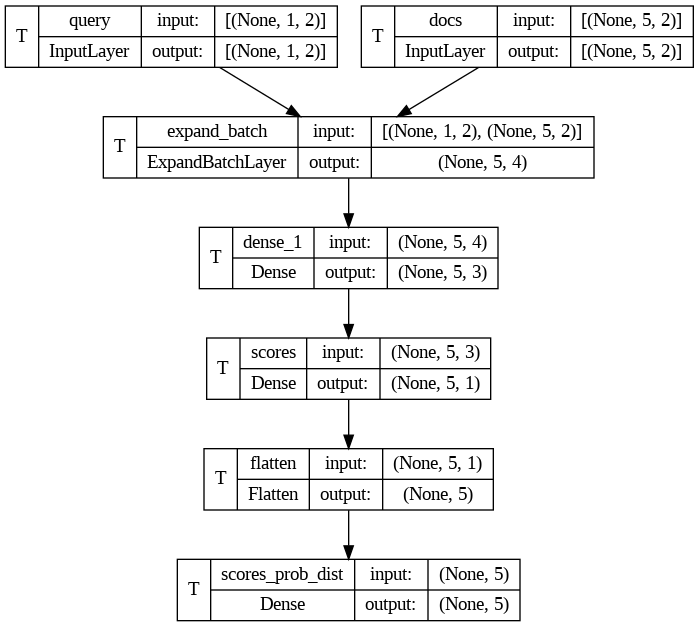

In [277]:
model = tf.keras.models.Model(inputs=[query_input, docs_input], outputs=[model_out])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9),
              loss=tf.keras.losses.KLDivergence())
print(model.summary())
tf.keras.utils.plot_model(model, show_trainable=True, show_shapes=True)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 query (InputLayer)          [(None, 1, 2)]               0         []                            
                                                                                                  
 docs (InputLayer)           [(None, 5, 2)]               0         []                            
                                                                                                  
 expand_batch (ExpandBatchL  (None, 5, 4)                 0         ['query[0][0]',               
 ayer)                                                               'docs[0][0]']                
                                                                                                  
 dense_1 (Dense)             (None, 5, 3)                 15        ['expand_batch[0][0]']  

In [278]:
hist = model.fit(
    [query_embeddings, docs_averaged_embeddings],
    relevance_grades_prob_dist,
    epochs=50,
    verbose=False
)

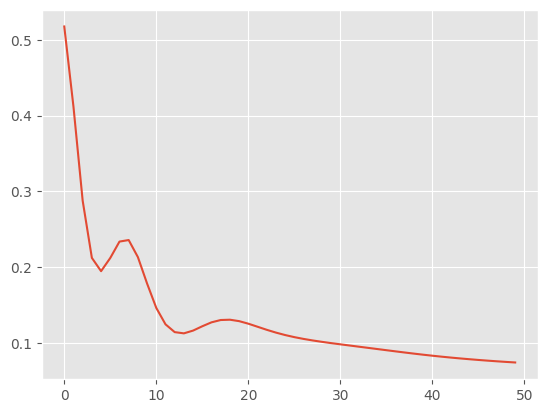

In [279]:
plt.plot(hist.history['loss'])

In [286]:
predicted_dist = model.predict([query_embeddings, docs_averaged_embeddings])
predicted_dist

1/1 [==============================] - 0s 423ms/step


array([[0.4611771 , 0.2812098 , 0.10451607, 0.11115596, 0.04194105],
       [0.42920667, 0.27663687, 0.12580544, 0.11388924, 0.05446181]],
      dtype=float32)

In [290]:
relevance_grades

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[3., 2., 2., 2., 1.],
       [3., 3., 1., 1., 0.]], dtype=float32)>

In [291]:
relevance_grades_prob_dist = tf.nn.softmax(relevance_grades, axis=-1)
relevance_grades_prob_dist

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[0.44663328, 0.1643072 , 0.1643072 , 0.1643072 , 0.06044524],
       [0.4309495 , 0.4309495 , 0.05832267, 0.05832267, 0.02145571]],
      dtype=float32)>

In [293]:
index = 1
predict_dist = predicted_dist[index]
true_dist = relevance_grades_prob_dist[index]
predict_dist, true_dist

(array([0.42920667, 0.27663687, 0.12580544, 0.11388924, 0.05446181],
       dtype=float32),
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.4309495 , 0.4309495 , 0.05832267, 0.05832267, 0.02145571],
       dtype=float32)>)

In [296]:
import seaborn as sns

def show_distribution(index):
  predict_dist = predicted_dist[index]
  true_dist = relevance_grades_prob_dist[index]
  true_dist = true_dist.numpy()


  # Create the first bar plot
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  sns.barplot(x=range(len(true_dist)), y=true_dist)
  plt.title('True Distribution')

  # Create the second bar plot
  plt.subplot(1, 2, 2)
  sns.barplot(x=range(len(predict_dist)), y=predict_dist)
  plt.title('Predicted Distribution')

  # Show the plots
  plt.tight_layout()
  plt.show()

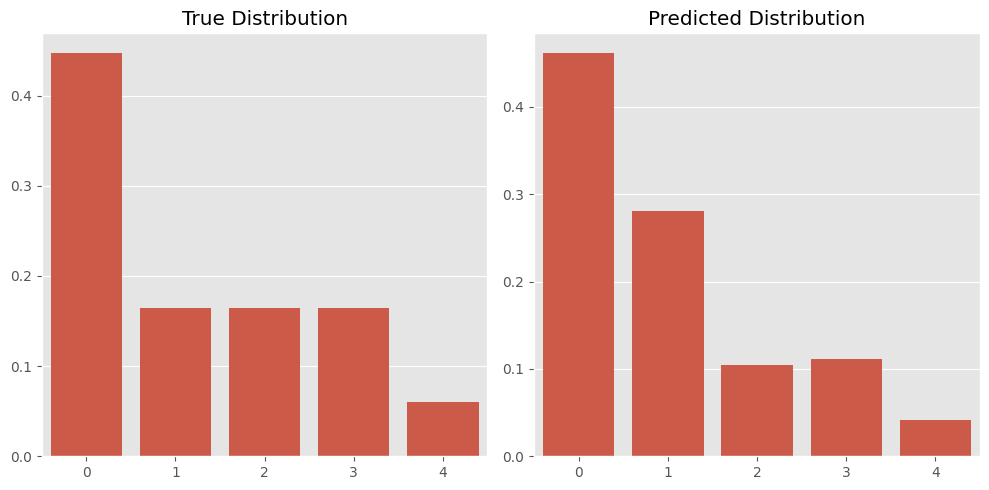

In [300]:
show_distribution(0)

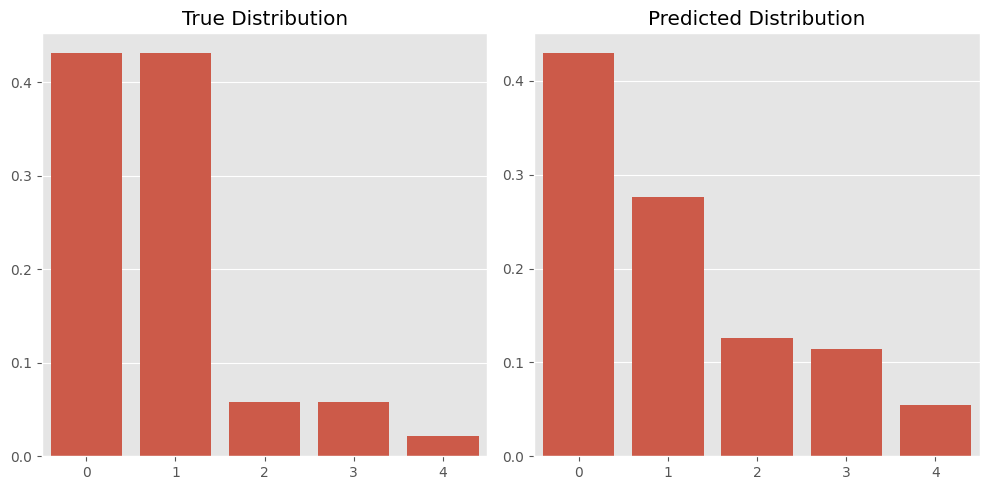

In [299]:
show_distribution(1)